Mean MSE: 8918274.588256862
Standard deviation: 3055797.605067533
R^2: 0.8463009951562078


[Text(0.5, 0.875, 'x[15] <= 0.457\nsquared_error = 69230819.864\nsamples = 100.0%\nvalue = 13304.899'),
 Text(0.25, 0.625, 'x[12] <= 0.41\nsquared_error = 21397496.587\nsamples = 90.8%\nvalue = 11120.777'),
 Text(0.125, 0.375, 'x[12] <= 0.341\nsquared_error = 6104711.004\nsamples = 59.5%\nvalue = 8509.187'),
 Text(0.0625, 0.125, 'squared_error = 2091057.499\nsamples = 42.5%\nvalue = 7427.969'),
 Text(0.1875, 0.125, 'squared_error = 5909819.485\nsamples = 17.0%\nvalue = 11212.231'),
 Text(0.375, 0.375, 'x[10] <= 0.692\nsquared_error = 12945937.326\nsamples = 31.4%\nvalue = 16071.917'),
 Text(0.3125, 0.125, 'squared_error = 10606795.003\nsamples = 28.1%\nvalue = 15476.791'),
 Text(0.4375, 0.125, 'squared_error = 3821880.0\nsamples = 3.3%\nvalue = 21190.0'),
 Text(0.75, 0.625, 'x[15] <= 0.481\nsquared_error = 26535986.506\nsamples = 9.2%\nvalue = 34990.107'),
 Text(0.625, 0.375, 'x[8] <= 0.764\nsquared_error = 6131939.556\nsamples = 2.0%\nvalue = 28442.667'),
 Text(0.5625, 0.125, 'squared

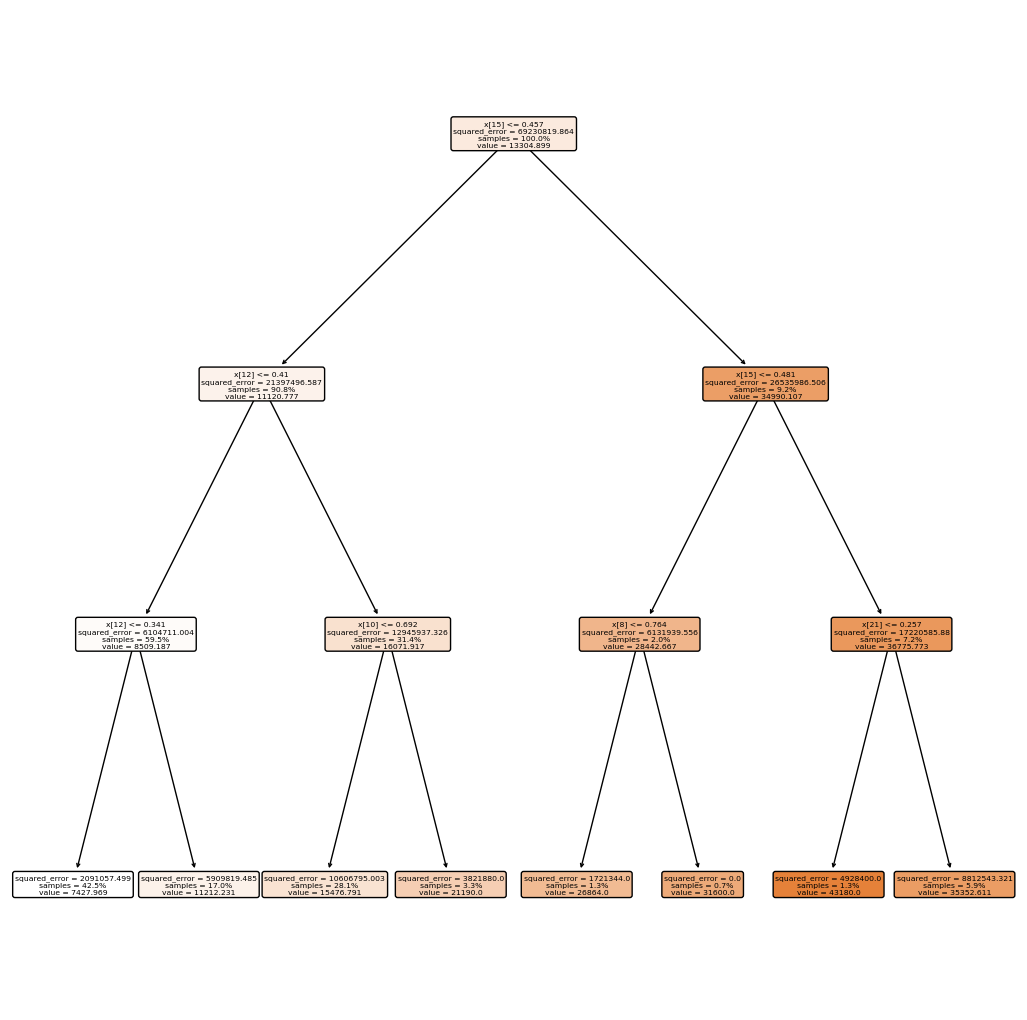

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

data = pd.read_csv("CarPrice.csv")

bx = data.drop(['price'], axis=1)
by = data[['price']]

#carname
#bx['CarName'] = bx['CarName'].astype('category').cat.codes
bx = bx.drop(['CarName'], axis=1)

#fueltype
fueltypeToInt = {
    "gas": 0,
    "diesel": 1
}
bx['fueltype'] = [fueltypeToInt[x] for x in bx['fueltype']]

#aspiration
aspirationToInt = {
    "std": 0,
    "turbo": 1
}
bx['aspiration'] = [aspirationToInt[x] for x in bx['aspiration']]

#doornumber
doornumberToInt = {
    "two": 2,
    "four": 4
}
bx['doornumber'] = [doornumberToInt[x] for x in bx['doornumber']]

#carbody
carbodyToInt = {
    "convertible": 0,
    "hatchback": 1,
    "sedan": 2,
    "wagon": 3,
    "hardtop": 4
}
bx['carbody'] = [carbodyToInt[x] for x in bx['carbody']]

#drivewheel
drivewheelToInt = {
    "rwd": 0,
    "fwd": 1,
    "4wd": 2
}
bx['drivewheel'] = [drivewheelToInt[x] for x in bx['drivewheel']]

#enginelocation
enginelocationToInt = {
    "front": 0,
    "rear": 1
}
bx['enginelocation'] = [enginelocationToInt[x] for x in bx['enginelocation']]

#enginetype
bx['enginetype'] = bx['enginetype'].astype('category').cat.codes

#cylindernumber
cylindernumberToInt = {
    "two": 2,
    "three": 3,
    "four": 4,
    "five": 5,
    "six": 6,
    "eight": 8,
    "twelve": 12
}
bx['cylindernumber'] = [cylindernumberToInt[x] for x in bx['cylindernumber']]

#fuelsystem
bx['fuelsystem'] = bx['fuelsystem'].astype('category').cat.codes

repeats = 5
mses = []
r2s = []

scaler = MinMaxScaler()

for i in range(0, repeats):
    bx_train, bx_test, by_train, by_test = train_test_split(bx, by, test_size=0.25)

    fit_scalar = scaler.fit(bx_train)
    bx_train_scaled = fit_scalar.transform(bx_train)

    dtm = DecisionTreeRegressor(max_depth=3)
    dtm.fit(bx_train_scaled, by_train.values.ravel())

    bx_test_scaled = fit_scalar.transform(bx_test)
    by_pred = dtm.predict(bx_test_scaled)
    mses.append(mean_squared_error(by_test, by_pred))
    r2s.append(r2_score(by_test, by_pred))

print("Mean MSE:", np.mean(mses))
print("Standard deviation:", np.std(mses))
print("R^2:", np.mean(r2s))

plt.figure(figsize=(13, 13))
tree.plot_tree(dtm, rounded=True, filled=True, proportion=True)